# **1. Import Library**

Import library yang dibutuhkan

In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Embedding, Flatten, Dot, Dense, Input

from math import log2
import numpy as np

import warnings

# **2. Load Dataset**

mengambil 2 dataset berbeda credit dan movie

In [2]:
df_credit = pd.read_csv(r'\Users\asus\Downloads\archive (11)\tmdb_5000_credits.csv')
df_movies = pd.read_csv(r'\Users\asus\Downloads\archive (11)\tmdb_5000_movies.csv')


Mengambil dataset ratings

In [3]:
df_ratings = pd.read_csv(r'\Users\asus\Downloads\ratings_small\ratings_small.csv')

# **3. Eksplorasi Data**

dataframe credit dengan 4 kolom

In [4]:
df_ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


Banyak user unik

In [5]:
print('Banyak user: ', len(df_ratings.userId.unique()))
print('user: ', df_ratings.userId.unique())

Banyak user:  671
user:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 2

Banyak film Unik

In [6]:
print('Banyak film yang direview: ', len(df_ratings.movieId.unique()))
print('user: ', df_ratings.movieId.unique())

Banyak film yang direview:  9066
user:  [  31 1029 1061 ...  129 4736 6425]


Melihat dataframe credit

In [7]:
df_credit

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


Banyak Judul Unik

In [8]:
print('Banyak judul: ', len(df_credit.title.unique()))
print('Judul: ', df_credit.title.unique())

Banyak judul:  4800
Judul:  ['Avatar' "Pirates of the Caribbean: At World's End" 'Spectre' ...
 'Signed, Sealed, Delivered' 'Shanghai Calling' 'My Date with Drew']


dataframe movies dengan  20 kolom

In [9]:
df_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

Banyak judul unik

In [10]:
print('Banyak judul: ', len(df_movies.title.unique()))
print('Judul: ', df_movies.title.unique())

Banyak judul:  4800
Judul:  ['Avatar' "Pirates of the Caribbean: At World's End" 'Spectre' ...
 'Signed, Sealed, Delivered' 'Shanghai Calling' 'My Date with Drew']


Top 10 film dengan popularitas tertinggi

bisa dilihat Minions sebagai film yang paling populer menurut dataset ini

C:\Users\asus\AppData\Local\Temp\ipykernel_18240\1960784805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_titles, x='popularity', y='title', palette='Blues_d')


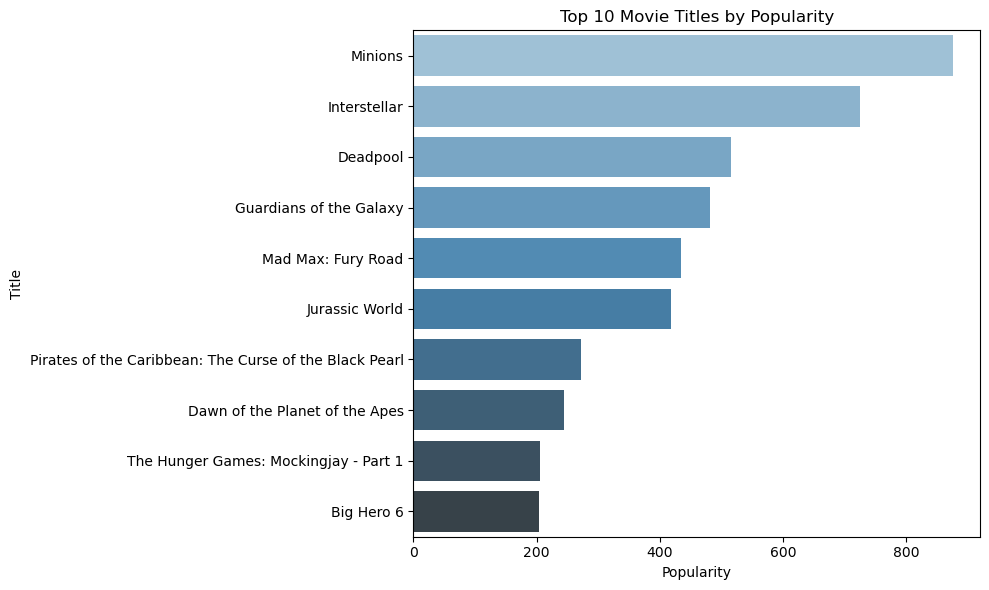

In [11]:
top_titles = df_movies.sort_values(by='popularity', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_titles, x='popularity', y='title', palette='Blues_d')
plt.title("Top 10 Movie Titles by Popularity")
plt.xlabel("Popularity")
plt.ylabel("Title")
plt.tight_layout()
plt.show()

# **4. Data Preprocessing**

Menggabungkan dataframe movies dan credit

In [12]:
df_credit = df_credit.rename(columns={'movie_id': 'id'})
df_merged = df_movies.merge(df_credit[['id', 'cast', 'crew']], on='id', how='left')

Contoh 5 baris teratas

In [13]:
df_merged.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Mengubah df_ratings menjadi hanya data yang ada pada df_merged

In [14]:
df_ratings = df_ratings[df_ratings['movieId'].isin(df_merged['id'])]

# **5. Data Preparation**

Melihat dataframe gabungan credit dan movie

In [15]:
df_merged

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_.

Melihat berapa data kosong pada merged

In [16]:
df_merged.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

Drop kolom homepage dan baris yang kosong

In [17]:
df_merged.drop(['homepage'], axis = 1, inplace=True)
df_merged.dropna(inplace = True)

Melihat data yg duplikat pada dataframe merged

In [18]:
df_merged.duplicated().sum()

0

Melihat hasil drop baris kosong

In [19]:
df_merged.isna().sum()


budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

Melihat informasi tipe data merged

In [20]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3959 entries, 0 to 4801
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3959 non-null   int64  
 1   genres                3959 non-null   object 
 2   id                    3959 non-null   int64  
 3   keywords              3959 non-null   object 
 4   original_language     3959 non-null   object 
 5   original_title        3959 non-null   object 
 6   overview              3959 non-null   object 
 7   popularity            3959 non-null   float64
 8   production_companies  3959 non-null   object 
 9   production_countries  3959 non-null   object 
 10  release_date          3959 non-null   object 
 11  revenue               3959 non-null   int64  
 12  runtime               3959 non-null   float64
 13  spoken_languages      3959 non-null   object 
 14  status                3959 non-null   object 
 15  tagline               3959

Ubah kolom 'movieId' menjadi 'id' agar lebih mudah pada df ratings

In [21]:
df_ratings['id'] = df_ratings['movieId']
df_ratings.drop(['movieId'], axis=1, inplace=True)
df_ratings

C:\Users\asus\AppData\Local\Temp\ipykernel_18240\2054899188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings['id'] = df_ratings['movieId']
C:\Users\asus\AppData\Local\Temp\ipykernel_18240\2054899188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings.drop(['movieId'], axis=1, inplace=True)


,userId,rating,timestamp,id
13,1,4.0,1260759139,2105
16,1,2.0,1260759108,2294
26,2,3.0,835355749,62
30,2,4.0,835355441,153
31,2,3.0,835355493,161
...,...,...,...,...
99953,671,4.0,1064890427,2959
99956,671,4.0,1063503947,3060
99969,671,4.0,1064245574,4011
99983,671,4.0,1064891537,4995


melihat data kosong pada ratings

In [22]:
df_ratings.isna().sum()

userId       0
rating       0
timestamp    0
id           0
dtype: int64

melihat jenis tipe data pada ratings

In [23]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18571 entries, 13 to 99993
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     18571 non-null  int64  
 1   rating     18571 non-null  float64
 2   timestamp  18571 non-null  int64  
 3   id         18571 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 725.4 KB


# **6. Model Development dengan Content Based Filtering**

membersihkan kolom overview sebelum melakukan vectorization dengan TF-IDF

In [24]:
df_movies['genres'] = df_movies['genres'].fillna('')
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_movies['genres']) 

menghitung kemiripan kosinus antar film berdasarkan TF-IDF overview dan membuat indeks untuk mencari posisi film berdasarkan judul

In [25]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) 
indices = pd.Series(df_movies.index, index=df_movies['title']).drop_duplicates()

fungsi rekomendasi yang akan memberikan 10 film paling mirip

In [26]:
def recommend(title, cosine_sim=cosine_sim):
    idx = indices[title]  
    sim_scores = list(enumerate(cosine_sim[idx])) 
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  
    movie_indices = [i[0] for i in sim_scores]
    return df_movies[['title', 'overview']].iloc[movie_indices]


Mencoba sistem rekomendasi dengan satu judul film

In [27]:
recommend("Iron Man")

,title,overview
7,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...
16,The Avengers,When an unexpected enemy emerges and threatens...
26,Captain America: Civil War,"Following the events of Age of Ultron, the col..."
31,Iron Man 3,When Tony Stark's world is torn apart by a for...
35,Transformers: Revenge of the Fallen,Sam Witwicky leaves the Autobots behind for a ...
36,Transformers: Age of Extinction,"As humanity picks up the pieces, following the..."
39,TRON: Legacy,"Sam Flynn, the tech-savvy and daring son of Ke..."
47,Star Trek Into Darkness,When the crew of the Enterprise is called back...
51,Pacific Rim,"When legions of monstrous creatures, known as ..."
52,Transformers: Dark of the Moon,Sam Witwicky takes his first tenuous steps int...


# **7. Proses Training**

dengan  menggunakan label encoder mengubah id user dan film menjadi angka berurutan

In [28]:
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

df_ratings['user'] = user_encoder.fit_transform(df_ratings['userId'])
df_ratings['movie'] = movie_encoder.fit_transform(df_ratings['id'])

num_users = df_ratings['user'].nunique()
num_movies = df_ratings['movie'].nunique()

C:\Users\asus\AppData\Local\Temp\ipykernel_18240\2680562473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings['user'] = user_encoder.fit_transform(df_ratings['userId'])
C:\Users\asus\AppData\Local\Temp\ipykernel_18240\2680562473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings['movie'] = movie_encoder.fit_transform(df_ratings['id'])


model neural network rekomendasi berbasis embedding untuk user dan film

In [29]:
class RecommenderNet(Model):
    def __init__(self, num_users, num_movies, embedding_size=50):
        super(RecommenderNet, self).__init__()
        self.user_embedding = Embedding(num_users, embedding_size, embeddings_initializer='he_normal')
        self.user_bias = Embedding(num_users, 1)
        self.movie_embedding = Embedding(num_movies, embedding_size, embeddings_initializer='he_normal')
        self.movie_bias = Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        
        dot_user_movie = tf.reduce_sum(user_vector * movie_vector, axis=1, keepdims=True)
        x = dot_user_movie + user_bias + movie_bias
        return tf.nn.sigmoid(x) 


Mendefinisikan fitur dan label, melakukan normalisasi rating, membagi data menjadi training dan testing, lalu melatih model RecommenderNet

In [30]:
X = df_ratings[['user', 'movie']].values
y = df_ratings['rating'].values

y = (y - y.min()) / (y.max() - y.min())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RecommenderNet(num_users, num_movies)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0799 - mae: 0.2366 - val_loss: 0.0697 - val_mae: 0.2172
Epoch 2/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0634 - mae: 0.2050 - val_loss: 0.0563 - val_mae: 0.1938
Epoch 3/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0474 - mae: 0.1759 - val_loss: 0.0463 - val_mae: 0.1732
Epoch 4/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0348 - mae: 0.1477 - val_loss: 0.0424 - val_mae: 0.1630
Epoch 5/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0262 - mae: 0.1250 - val_loss: 0.0410 - val_mae: 0.1593
Epoch 6/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0204 - mae: 0.1095 - val_loss: 0.0407 - val_mae: 0.1584
Epoch 7/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0163 - mae: 0.0972 - val_loss: 0.0410 - val_mae: 0.1589
Epoch 8/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0126 - mae: 0.0849 - val_loss: 0.0416 - val_mae: 0.1601
Epoch 9/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - lo

Fungsi yang akan dipanggil untuk menampilkan output film hasil rekomendasi

In [31]:
def show_simple_recommendations(user_id_target, model, df_ratings, df_movies, user_encoder, movie_encoder, top_n=10):
    encoded_user_id = user_encoder.transform([user_id_target])[0]

    all_movie_encoded_ids = np.arange(len(movie_encoder.classes_))

    user_movie_input = np.array([[encoded_user_id, movie_id] for movie_id in all_movie_encoded_ids])
    predicted_ratings = model.predict(user_movie_input).flatten()

    top_indices = predicted_ratings.argsort()[-top_n:][::-1]
    top_movie_encoded_ids = all_movie_encoded_ids[top_indices]
    top_movie_ids = movie_encoder.inverse_transform(top_movie_encoded_ids)

    recommendations = df_movies[df_movies['id'].isin(top_movie_ids)][['id', 'title', 'overview']].copy()
    recommendations['predicted_rating'] = predicted_ratings[top_indices]

    print(f"Rekomendasi film untuk User ID {user_id_target}:")
    
    for i, row in recommendations.iterrows():
        print(f"----------------------------")
        print(f"Judul: {row['title']}")
        print(f"ID Film: {row['id']}")
        print(f"Prediksi Rating: {row['predicted_rating']:.2f}")
        print(f"Sinopsis: {row['overview'][:250]}...\n")

    return recommendations.reset_index(drop=True)


Memanggil fungsi dengan parameter id dan jumlah film yang bisa diubah sesuai keingnan

In [32]:
rekomendasi = show_simple_recommendations(
    user_id_target=30,
    model=model,
    df_ratings=df_ratings,
    df_movies=df_movies,
    user_encoder=user_encoder,
    movie_encoder=movie_encoder,
    top_n=5
)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Rekomendasi film untuk User ID 30:
----------------------------
Judul: Terminator 3: Rise of the Machines
ID Film: 296
Prediksi Rating: 0.94
Sinopsis: It's been 10 years since John Connor saved Earth from Judgment Day, and he's now living under the radar, steering clear of using anything Skynet can trace. That is, until he encounters T-X, a robotic assassin ordered to finish what T-1000 started. Go...

----------------------------
Judul: Cinderella Man
ID Film: 921
Prediksi Rating: 0.93
Sinopsis: The true story of boxer, Jim Braddock who, in the 1920’s after his retirement, has a surprise comeback in order to get him and his family out of a socially poor state....

----------------------------
Judul: Flags of Our Fathers
ID Film: 3683
Prediksi Rating: 0.92
Sinopsis: There were five Marines and one Navy Corpsman photographed raising the U.S. flag on Mt. Suribachi by Joe Rosenthal on February 23, 1945. This is the story of three of the six survivin

# **8. Evaluasi**

Evaluasi ReccomenderNet

Visualisasi metriks MSE dan MAE

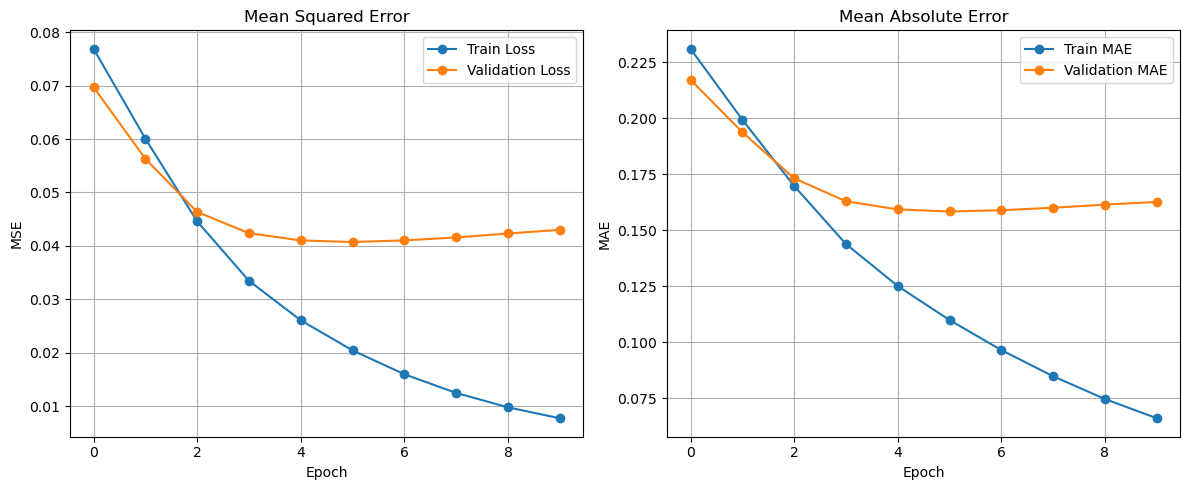

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE', marker='o')
plt.plot(history.history['val_mae'], label='Validation MAE', marker='o')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Evaluasi Content Based Filtering

In [34]:
ground_truth = df_ratings[df_ratings['rating'] >= 4.0].groupby('userId')['id'].apply(set)

Membuat ground truth untuk Tiap User

In [35]:
def get_cb_recommendations(user_id, k=10):
    watched_ids = df_ratings[df_ratings['userId'] == user_id]['id'].tolist()
    
    recommended_ids = set()
    
    liked_movies = df_ratings[(df_ratings['userId'] == user_id) & (df_ratings['rating'] >= 4)]
    base_titles = df_merged[df_merged['id'].isin(liked_movies['id'])]['title'].tolist()
    
    for title in base_titles:
        if title in indices:
            recs = recommend(title)
            recommended_ids.update(df_merged[df_merged['title'].isin(recs['title'])]['id'].tolist())
        if len(recommended_ids) >= k:
            break

    return list(recommended_ids)[:k]


Mendefinisikan fungsi untuk mendapatkan rekomendasi dari model content-based

In [36]:
def evaluation(user_id, k=10):
    true_items = ground_truth.get(user_id, set())
    if not true_items:
        return None

    predicted_items = get_cb_recommendations(user_id, k)

    hits = [item for item in predicted_items if item in true_items]
    precision = len(hits) / k
    recall = len(hits) / len(true_items)

    dcg = sum([(1 / log2(i + 2)) if predicted_items[i] in true_items else 0 for i in range(len(predicted_items))])
    ideal_dcg = sum([1 / log2(i + 2) for i in range(min(len(true_items), k))])
    ndcg = dcg / ideal_dcg if ideal_dcg > 0 else 0

    return precision, recall, ndcg

Memanggil fungsi untuk mendapatkan precision@k, recall@k, dan NDCG@k

In [37]:
user_ids = df_ratings['userId'].unique()
precision_list, recall_list, ndcg_list = [], [], []

for uid in user_ids[:100]:  
    result = evaluation(uid, k=10)
    if result:
        p, r, n = result
        precision_list.append(p)
        recall_list.append(r)
        ndcg_list.append(n)

print(f'Average Precision@10: {np.mean(precision_list):.4f}')
print(f'Average Recall@10   : {np.mean(recall_list):.4f}')
print(f'Average NDCG@10     : {np.mean(ndcg_list):.4f}')

Average Precision@10: 0.0773
Average Recall@10   : 0.1081
Average NDCG@10     : 0.1034
